In [45]:
import pandas as pd
import string
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans


# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

### Part 1: Naive Bayes

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question.

Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc.
You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accuracy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat above Task  with Tf-Idf features.

In [46]:
# with open('train_test_index.pickle', 'rb') as handle:
#     train_test_index_dict = pickle.load(handle)
# data = pd.read_csv('product_reviews.csv')

In [47]:
# !gdown 1tdrwypQMAo_FiWNLjTEn7usXoJBpqryL
with open('/content/train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

# !gdown 1Qj91xCEYs6-DQv4xO4ohOcSNHbz6ZN4e
# data = pd.read_csv('/content/product_reviews.csv')

# !gdown 13FkiLLIN_nVVAY-ztdfcZDzny-rES-bLbbBt0fyhch0
data = pd.read_excel('/content/product_reviews.xlsx')

In [48]:
data.head()

,text,stars
0,Total bill for this horrible service? Over $8G...,1
1,Went in for a lunch. Steak sandwich was delici...,5
2,This place has gone down hill. Clearly they h...,1
3,"Walked in around 4 on a Friday afternoon, we s...",1
4,Michael from Red Carpet VIP is amazing ! I rea...,4


Value:{'train_index': [6914, 8332, 2791, 25106, 11135, 24667, 17806, 25963, 9915, ...], 'test_index': [9576, 7281, 22608, 4134, 18759, 26639, 4711, 2881, 25625, ...]}


In [49]:
# train_test_index_dict

In [50]:
# # Function to clean and preprocess text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Apply stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the cleaning function to the 'text' column
data['clean_text'] = data['text'].apply(clean_text)


In [51]:
data.head()

,text,stars,clean_text
0,Total bill for this horrible service? Over $8G...,1,total bill horribl servic 8g crook actual nerv...
1,Went in for a lunch. Steak sandwich was delici...,5,went lunch steak sandwich delici caesar salad ...
2,This place has gone down hill. Clearly they h...,1,place gone hill clearli cut back staff food qu...
3,"Walked in around 4 on a Friday afternoon, we s...",1,walk around 4 friday afternoon sat tabl bar wa...
4,Michael from Red Carpet VIP is amazing ! I rea...,4,michael red carpet vip amaz reach need help pl...


In [52]:
# Get the train and test indices
train_index = train_test_index_dict['train_index']
test_index = train_test_index_dict['test_index']

# Split the dataset into train and test sets
X_train = data.loc[train_index, 'clean_text']
y_train = data.loc[train_index, 'stars']
X_test = data.loc[test_index, 'clean_text']
y_test = data.loc[test_index, 'stars']

In [53]:
# Initialize CountVectorizer with optimized parameters
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_bow = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

# Predict on the test data
y_pred = nb_classifier.predict(X_test_bow)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.75      0.74      1149
           2       0.46      0.09      0.15       587
           4       0.48      0.49      0.49      1981
           5       0.79      0.84      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.55      0.55      8799
weighted avg       0.69      0.70      0.69      8799



In [54]:
# Initialize TfidfVectorizer with optimized parameters
tfidf_vectorizer = TfidfVectorizer(min_df=8)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# Evaluate the classifier
print("TF-IDF Features:")
print(classification_report(y_test, y_pred_tfidf))

TF-IDF Features:
              precision    recall  f1-score   support

           1       0.81      0.58      0.68      1149
           2       0.44      0.01      0.03       587
           4       0.50      0.17      0.26      1981
           5       0.68      0.97      0.80      5082

    accuracy                           0.68      8799
   macro avg       0.61      0.43      0.44      8799
weighted avg       0.64      0.68      0.61      8799



### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english). You can use sklearn for this question.
[Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)


Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform above task with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering.

In [55]:
# f = gzip.GzipFile('roberta_embeds.npy.gz', "r")

In [56]:
# !gdown 1NUnRNoBtTxWe-eupm80p8QPGEd5x130a
f = gzip.GzipFile('/content/roberta_embeds.npy.gz', "r")

In [57]:
embeds = np.load(f)
print(embeds.shape)
print(embeds)

(26661, 1024)
[[ 0.50699836  0.61128891 -0.2719104  ...  1.0390445  -0.80041009
   0.73497975]
 [-0.02217656 -0.1527285  -0.55813098 ...  0.18087101  0.16279726
  -0.41220728]
 [ 0.52932245  0.60723621 -0.25953016 ...  1.0670861  -0.75681108
   0.69999683]
 ...
 [-0.05420208 -0.14062414 -0.55579591 ...  0.12184423  0.12340328
  -0.31265116]
 [-0.02863726 -0.14980018 -0.55721784 ...  0.17685497  0.16171496
  -0.39407209]
 [-0.02447684 -0.15692814 -0.55817062 ...  0.17620397  0.16273451
  -0.39889568]]


In [58]:
# Initialize list to store WCSS values
wcss = []

# Try various values for k
for i in range(1, 11):
    print(i)
    # Initialize centroids and Initialize k-means with current value of k
    kmeans = KMeans(n_clusters=i, n_init=1, init=np.random.rand(i, 1024), random_state=42)
    # Fit k-means to the embeddings
    kmeans.fit_predict(embeds)
    # Append WCSS to the list
    wcss.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10


In [59]:
# Initialize list to store WCSS values for k-means++
wcss_kmeans_pp = []


# Try various values for k
for i in range(1, 11):
    print(i)
    # Initialize k-means with k-means++ initialization
    kmeans_pp = KMeans(n_clusters=i, n_init='auto', init='k-means++', random_state=42)
    # Fit k-means++ to the embeddings
    kmeans_pp.fit_predict(embeds)
    # Append WCSS to the list for k-means++
    wcss_kmeans_pp.append(kmeans_pp.inertia_)

1
2
3
4
5
6
7
8
9
10


In [60]:
# Initialize list to store WCSS values for Forgy ("random" in sklearn)
wcss_forgy = []

# Try various values for k
for i in range(1, 11):
    print(i)
    # Initialize k-means with Forgy ("random" in sklearn) initialization
    forgy = KMeans(n_clusters=i, n_init='auto', init='random', random_state=42)
    # Fit Forgy to the embeddings
    forgy.fit_predict(embeds)
    # Append WCSS to the list for Forgy
    wcss_forgy.append(forgy.inertia_)

1
2
3
4
5
6
7
8
9
10


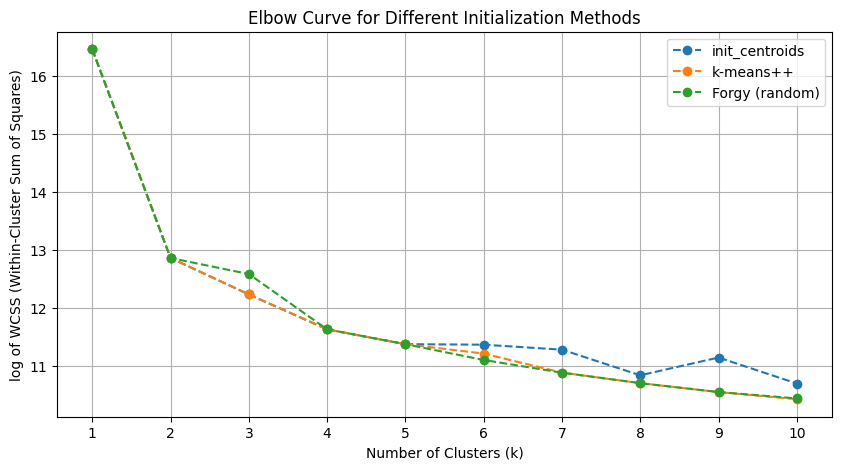

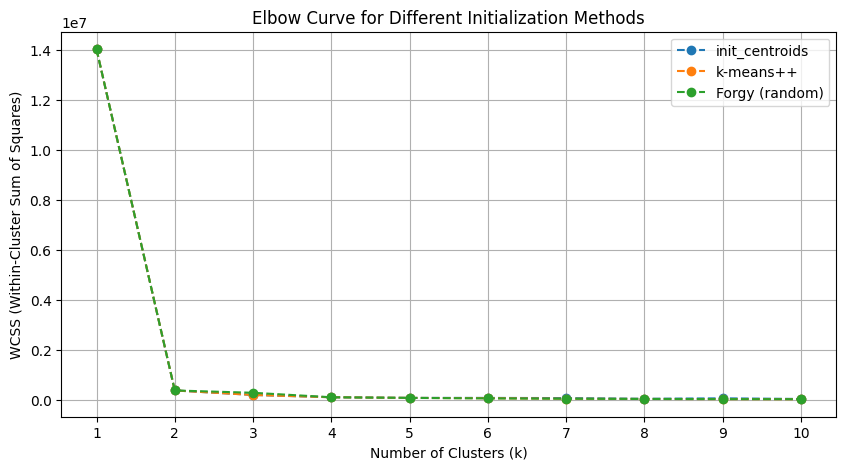

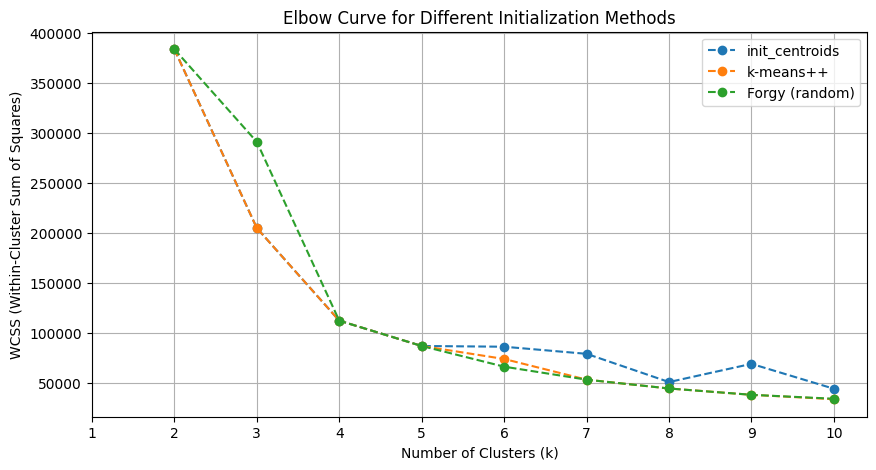

In [69]:
from numpy import log
# Plot the log elbow curves for init_centroids, k-means++ and Forgy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), log(wcss), marker='o', linestyle='--', label='init_centroids')
plt.plot(range(1, 11), log(wcss_kmeans_pp), marker='o', linestyle='--', label='k-means++')
plt.plot(range(1, 11), log(wcss_forgy), marker='o', linestyle='--', label='Forgy (random)')
plt.title('Elbow Curve for Different Initialization Methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('log of WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

# Plot the elbow curves for init_centroids, k-means++ and Forgy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', label='init_centroids')
plt.plot(range(1, 11), wcss_kmeans_pp, marker='o', linestyle='--', label='k-means++')
plt.plot(range(1, 11), wcss_forgy, marker='o', linestyle='--', label='Forgy (random)')
plt.title('Elbow Curve for Different Initialization Methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

# Plot the elbow curves for init_centroids, k-means++ and Forgy
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss[1:], marker='o', linestyle='--', label='init_centroids')
plt.plot(range(2, 11), wcss_kmeans_pp[1:], marker='o', linestyle='--', label='k-means++')
plt.plot(range(2, 11), wcss_forgy[1:], marker='o', linestyle='--', label='Forgy (random)')
plt.title('Elbow Curve for Different Initialization Methods')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

In [62]:
# Ground truth labels (stars)
y_true = data.loc[:, 'stars'].copy()
NUM_CLUSTERS = 4

# KMeans clustering using k-means++ initialization
kmeans_pp = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', random_state=42)
y_pred_kmeans_pp = kmeans_pp.fit_predict(embeds)

# print(y_true)
# print(y_pred_kmeans_pp)
# print(np.unique(y_true))
# print(np.unique(y_pred_kmeans_pp))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0        1
1        5
2        1
3        1
4        4
        ..
26656    1
26657    2
26658    4
26659    5
26660    5
Name: stars, Length: 26661, dtype: int64
[1 2 1 ... 2 2 2]
[1 2 4 5]
[0 1 2 3]


In [63]:
for i in range(26661):
    if y_true[i] == 1: y_true[i] = 0
    elif y_true[i] == 2: y_true[i] = 1
    elif y_true[i] == 4: y_true[i] = 2
    elif y_true[i] == 5: y_true[i] = 3
# print(y_true)
# print(y_pred_kmeans_pp)
# print(np.unique(y_true))
# print(np.unique(y_pred_kmeans_pp))

0        0
1        3
2        0
3        0
4        2
        ..
26656    0
26657    1
26658    2
26659    3
26660    3
Name: stars, Length: 26661, dtype: int64
[1 2 1 ... 2 2 2]
[0 1 2 3]
[0 1 2 3]


In [72]:
import numpy as np

def confusion_matrix_scratch(y_true, y_pred):
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    n_classes = len(classes)
    n_clusters = len(clusters)
    cm = np.zeros((n_classes, n_clusters))

    for i in range(len(y_true)):
        cm[y_true[i], y_pred[i]] += 1

    return cm

def purity_score_scratch(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.max(cm, axis=0)) / np.sum(cm)

def entropy_scratch(labels):
    unique_labels = np.unique(labels)
    n_samples = len(labels)
    entropy = 0
    for label in unique_labels:
        count = np.sum(labels == label)
        p = count / n_samples
        entropy -= p * np.log2(p)
    return entropy

def mutual_information_scratch(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    n_classes, n_clusters = cm.shape
    mutual_info = 0
    h_true = entropy_scratch(y_true)
    h_pred = entropy_scratch(y_pred)

    for i in range(n_classes):
        for j in range(n_clusters):
            if cm[i, j] > 0:
                p_ij = cm[i, j] / np.sum(cm)
                p_i = np.sum(cm[i, :]) / np.sum(cm)
                p_j = np.sum(cm[:, j]) / np.sum(cm)
                mutual_info += p_ij * np.log2(p_ij / (p_i * p_j))

    return mutual_info

def normalized_mutual_info_score_scratch(y_true, y_pred):
    mi = mutual_information_scratch(y_true, y_pred)
    h_true = entropy_scratch(y_true)
    h_pred = entropy_scratch(y_pred)
    nmi = mi / np.sqrt(h_true * h_pred)
    return nmi

def rand_score_scratch(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    n_samples = len(y_true)
    # print(cm)
    TP = np.sum(cm * (cm - 1) / 2)
    FP = np.sum(cm.sum(axis=0) * cm.sum(axis=0) / 2) - TP
    FN = np.sum(cm.sum(axis=1) * cm.sum(axis=1) / 2) - TP
    TN = n_samples * (n_samples - 1) / 2 - (TP + FP + FN)
    rand_index = (TP + TN) / (TP + FP + FN + TN)
    return rand_index.mean()



# Compute purity
purity_kmeans_pp = purity_score_scratch(y_true, y_pred_kmeans_pp)

# Compute normalized mutual information (NMI)
nmi_kmeans_pp = normalized_mutual_info_score_scratch(y_true, y_pred_kmeans_pp)

# Compute Rand score
rand_score_kmeans_pp = rand_score_scratch(y_true, y_pred_kmeans_pp)

print("KMeans with k-means++ initialization:")
print("Purity:", purity_kmeans_pp)
print("NMI:", nmi_kmeans_pp)
print("Rand score:", rand_score_kmeans_pp)


KMeans with k-means++ initialization:
Purity: 0.7132140579873223
NMI: 0.5358546011063247
Rand score: 0.7274984887777025


In [65]:
from sklearn.metrics import confusion_matrix, pairwise_distances, normalized_mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score, rand_score, contingency_matrix

def purity_score(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Return purity
    return np.sum(np.max(cm, axis=0)) / np.sum(cm)

# Compute purity
purity_kmeans_pp = purity_score(y_true, y_pred_kmeans_pp)

# Compute normalized mutual information (NMI)
nmi_kmeans_pp = normalized_mutual_info_score(y_true, y_pred_kmeans_pp)

# Compute Rand score
rand_score_kmeans_pp = rand_score(y_true, y_pred_kmeans_pp)

print("KMeans with k-means++ initialization:")
print("Purity:", purity_kmeans_pp)
print("NMI:", nmi_kmeans_pp)
print("Rand score:", rand_score_kmeans_pp)


KMeans with k-means++ initialization:
Purity: 0.7132140579873223
NMI: 0.5200273108478978
Rand score: 0.7275735075323911


In [66]:
# import numpy as np
# from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix
# from sklearn.metrics import normalized_mutual_info_score as sklearn_normalized_mutual_info_score
# from sklearn.metrics import adjusted_rand_score as sklearn_rand_score

# def confusion_matrix_sklearn(y_true, y_pred):
#     return sklearn_confusion_matrix(y_true, y_pred)

# def purity_score_sklearn(y_true, y_pred):
#     cm = confusion_matrix_sklearn(y_true, y_pred)
#     return np.sum(np.max(cm, axis=0)) / np.sum(cm)

# def normalized_mutual_info_score_sklearn(y_true, y_pred):
#     return sklearn_normalized_mutual_info_score(y_true, y_pred)

# def adjusted_rand_score_sklearn(y_true, y_pred):
#     return sklearn_rand_score(y_true, y_pred)

# def entropy(labels):
#     unique_labels = np.unique(labels)
#     n_samples = len(labels)
#     entropy = 0
#     for label in unique_labels:
#         count = np.sum(labels == label)
#         p = count / n_samples
#         entropy -= p * np.log2(p)
#     return entropy

# def mutual_information(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     n_classes, n_clusters = cm.shape
#     mutual_info = 0
#     h_true = entropy(y_true)
#     h_pred = entropy(y_pred)

#     for i in range(n_classes):
#         for j in range(n_clusters):
#             if cm[i, j] > 0:
#                 p_ij = cm[i, j] / np.sum(cm)
#                 p_i = np.sum(cm[i, :]) / np.sum(cm)
#                 p_j = np.sum(cm[:, j]) / np.sum(cm)
#                 mutual_info += p_ij * np.log2(p_ij / (p_i * p_j))

#     return mutual_info

# def normalized_mutual_info_score_scratch(y_true, y_pred):
#     mi = mutual_information(y_true, y_pred)
#     h_true = entropy(y_true)
#     h_pred = entropy(y_pred)
#     nmi = mi / np.sqrt(h_true * h_pred)
#     return nmi

# def rand_score(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     n_samples = len(y_true)
#     tp_plus_fp = np.sum(np.square(np.sum(cm, axis=1)))
#     tp_plus_fn = np.sum(np.square(np.sum(cm, axis=0)))
#     tp = np.sum(np.square(cm))
#     tn = n_samples * (n_samples - 1) / 2 - (tp_plus_fp + tp_plus_fn - tp)
#     return (tp + tn) / (tp_plus_fp + tp_plus_fn)

# def rand_score_scratch(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     n_samples = len(y_true)
#     tp_plus_fp = np.sum(np.square(np.sum(cm, axis=1)))
#     tp_plus_fn = np.sum(np.square(np.sum(cm, axis=0)))
#     tp = np.sum(np.square(cm))
#     tn = n_samples * (n_samples - 1) / 2 - (tp_plus_fp + tp_plus_fn - tp)
#     return (tp + tn) / (tp_plus_fp + tp_plus_fn)

# # Ground truth labels (stars)
# y_true = data.loc[:, 'stars']
# NUM_CLUSTERS = 4

# # KMeans clustering using k-means++ initialization
# kmeans_pp = KMeans(n_clusters=NUM_CLUSTERS, init='k-means++', random_state=42)
# y_pred_kmeans_pp = kmeans_pp.fit_predict(embeds)

# # Compute purity, NMI, and Rand score using sklearn functions
# purity_kmeans_pp_sklearn = purity_score_sklearn(y_true, y_pred_kmeans_pp)
# nmi_kmeans_pp_sklearn = normalized_mutual_info_score_sklearn(y_true, y_pred_kmeans_pp)
# rand_score_kmeans_pp_sklearn = adjusted_rand_score_sklearn(y_true, y_pred_kmeans_pp)

# # Compute purity, NMI, and Rand score from scratch
# purity_kmeans_pp_scratch = purity_score(y_true, y_pred_kmeans_pp)
# nmi_kmeans_pp_scratch = normalized_mutual_info_score_scratch(y_true, y_pred_kmeans_pp)
# rand_score_kmeans_pp_scratch = rand_score_scratch(y_true, y_pred_kmeans_pp)

# print("Metrics using sklearn functions:")
# print("Purity:", purity_kmeans_pp_sklearn)
# print("NMI:", nmi_kmeans_pp_sklearn)
# print("Rand score:", rand_score_kmeans_pp_sklearn)

# print("\nMetrics computed from scratch:")
# print("Purity:", purity_kmeans_pp_scratch)
# print("NMI:", nmi_kmeans_pp_scratch)
# print("Rand score:", rand_score_kmeans_pp_scratch)


In [67]:
# from sklearn.metrics import accuracy_score, confusion_matrix

# def purity_score_sklearn(y_true, y_pred):
#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     # Return purity
#     return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

# # Evaluate clustering with ground truth labels (y_true) and predicted labels (y_pred)
# purity_sklearn = purity_score_sklearn(y_true, y_pred)
# nmi_sklearn = normalized_mutual_info_score(y_true, y_pred)
# ari_sklearn = adjusted_rand_score(y_true, y_pred)

# print("Metrics calculated using scikit-learn:")
# print("Purity:", purity_sklearn)
# print("NMI:", nmi_sklearn)
# print("Adjusted Rand Score:", ari_sklearn)


In [68]:
# def purity_score(y_true, y_pred):
#     contingency = contingency_matrix(y_true, y_pred)
#     return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

# def rand_score(y_true, y_pred):
#     contingency = contingency_matrix(y_true, y_pred)
#     n = contingency.sum()
#     tp_plus_fp = np.sum(np.array([np.sum(contingency[i]) ** 2 for i in range(len(contingency))]))
#     tp_plus_fn = np.sum(np.array([np.sum(contingency[:, j]) ** 2 for j in range(len(contingency[0]))]))
#     tp = np.trace(contingency)
#     return (tp + (n - tp) - (tp_plus_fp + tp_plus_fn) / 2) / (n * (n - 1) / 2)

# # Ground truth labels (star ratings)
# y_true = data['stars']

# # Clustering labels obtained from KMeans
# kmeans_labels = KMeans(n_clusters=4, init='k-means++', random_state=0).fit_predict(embeds)

# # Evaluate clustering using purity, NMI, and Rand score
# purity = purity_score(y_true, kmeans_labels)
# nmi = normalized_mutual_info_score(y_true, kmeans_labels)
# rand = rand_score(y_true, kmeans_labels)

# print("Purity:", purity)
# print("NMI:", nmi)
# print("Rand Score:", rand)
